<a href="https://colab.research.google.com/github/JIJASH/data_mining_and_warehousing/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - V

## Question 1: Province with Most Hydropowers and Map Plotting

In [1]:
hydropower_data = '/content/drive/MyDrive/data_mining_and_warehousing/hydropower-projects.csv'

In [2]:
def read_csv(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        header = [col.strip('"') for col in lines[0].strip().split(',')]
        data = []
        for line in lines[1:]:
            if line.strip():
                row = [field.strip('"') for field in line.strip().split(',')]
                if len(row) == len(header):
                    data.append(row)
    return header, data

header, hydropower_projects = read_csv(hydropower_data)
print(f"Loaded {len(hydropower_projects)} projects")

Loaded 76 projects


In [3]:
# Count hydropowers by province
province_index = header.index('Province')
province_count = {}
for row in hydropower_projects:
    province = row[province_index]
    province_count[province] = province_count.get(province, 0) + 1

# Find province with most hydropowers
max_province = max(province_count, key=province_count.get)
print(f"Province with most hydropowers: {max_province} ({province_count[max_province]} projects)")

for province, count in sorted(province_count.items(), key=lambda x: x[1], reverse=True):
    print(f"{province}: {count}")

Province with most hydropowers: Province 4 (29 projects)
Province 4: 29
Province 3: 21
Province 1: 16
Province 5: 5
Province 6: 3
Province 7: 2


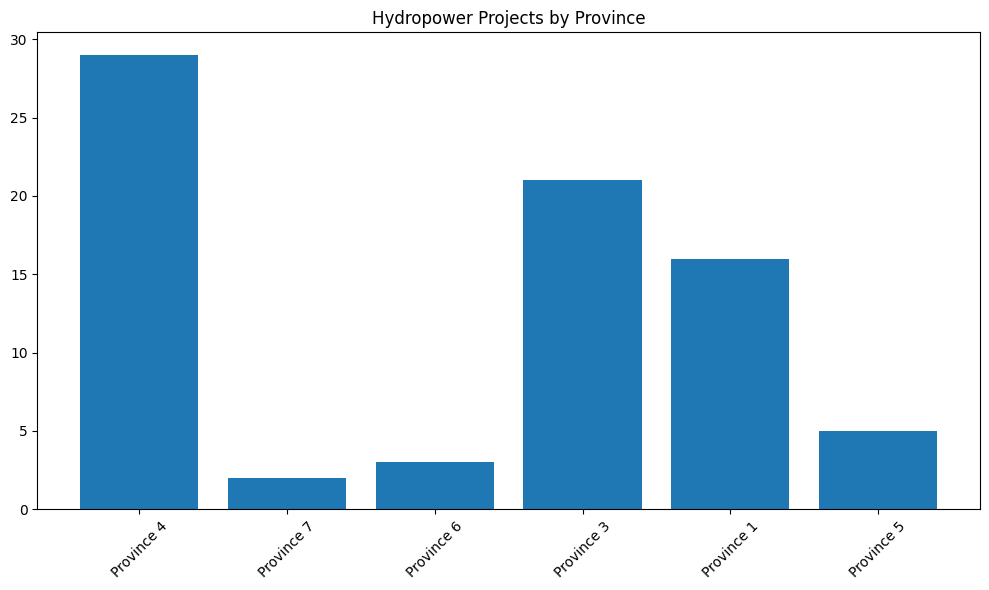

In [4]:
# Plot province counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(province_count.keys(), province_count.values())
plt.title('Hydropower Projects by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get coordinates for max province
lat_index = header.index('Latitude')
lon_index = header.index('Longitude')
coords = []
for row in hydropower_projects:
    if row[province_index] == max_province:
        try:
            coords.append((float(row[lat_index]), float(row[lon_index])))
        except:
            pass

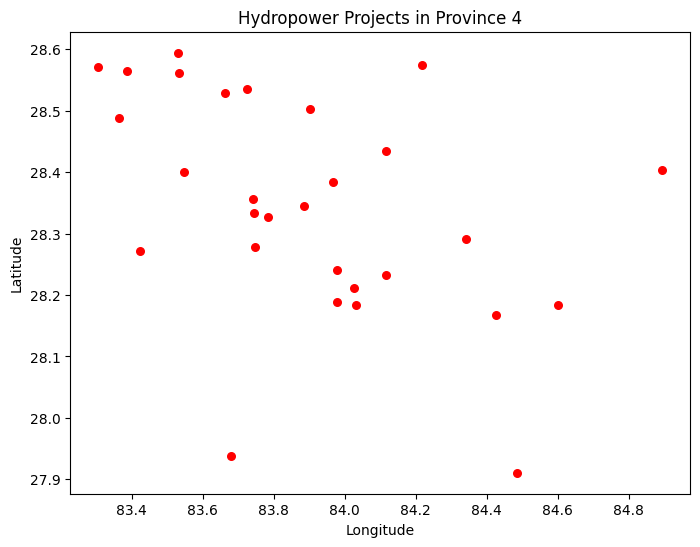

In [5]:
# Plot map
lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

plt.figure(figsize=(8, 6))
plt.scatter(lons, lats, c='red', s=30)
plt.title(f'Hydropower Projects in {max_province}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Question 2: Web Scraping and Word Count Analysis

In [6]:
# Simple web scraping
import urllib.request
import re

def scrape_text(url):
    try:
        with urllib.request.urlopen(url) as response:
            html = response.read().decode('utf-8')
        text = re.sub(r'<[^>]+>', ' ', html)
        return re.sub(r'\s+', ' ', text).strip()
    except:
        return ""

urls = [
    "https://en.wikipedia.org/wiki/Markov_decision_process",
    "https://en.wikipedia.org/wiki/Reinforcement_learning",
    "https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning",
    "https://en.wikipedia.org/wiki/Andrew_Barto",
    "https://en.wikipedia.org/wiki/Richard_S._Sutton",
    "https://pt.wikipedia.org/wiki/Aprendizagem_por_reforço"
]

all_text = ""
for url in urls:
    all_text += " " + scrape_text(url)

In [7]:
# Count words
words = re.findall(r'\b[a-zA-Z]{3,}\b', all_text.lower())
word_count = {}
for word in words:
    word_count[word] = word_count.get(word, 0) + 1

# Remove common words
stop_words = {'the', 'and', 'are', 'for', 'not', 'but', 'was', 'his', 'her', 'you', 'all', 'can', 'may', 'use', 'with', 'from', 'they', 'been', 'have', 'were', 'said', 'each', 'which', 'them', 'than', 'many', 'some', 'time', 'very', 'when', 'much', 'new', 'way', 'who', 'its', 'now', 'more', 'any', 'one', 'also', 'after', 'first', 'well', 'get', 'here', 'should', 'over', 'such', 'take', 'see', 'only', 'come', 'could', 'want', 'end', 'put', 'old', 'why', 'let', 'same', 'big', 'begin', 'seem', 'help', 'turn', 'ask', 'show', 'try', 'last', 'long', 'make', 'thing', 'say', 'how', 'out', 'man', 'day', 'too', 'she', 'our', 'way', 'even', 'back', 'good', 'through', 'just', 'form', 'think', 'where', 'much'}

filtered_words = {word: count for word, count in word_count.items() if word not in stop_words}
top_20 = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)[:20]

for word, count in top_20:
    print(f"{word}: {count}")

output: 730
parser: 725
learning: 437
reinforcement: 248
displaystyle: 238
hlist: 218
nbsp: 178
ext: 141
navbox: 132
policy: 125
state: 124
color: 117
value: 116
edit: 108
skin: 106
sidebar: 104
margin: 104
agent: 103
that: 103
font: 102


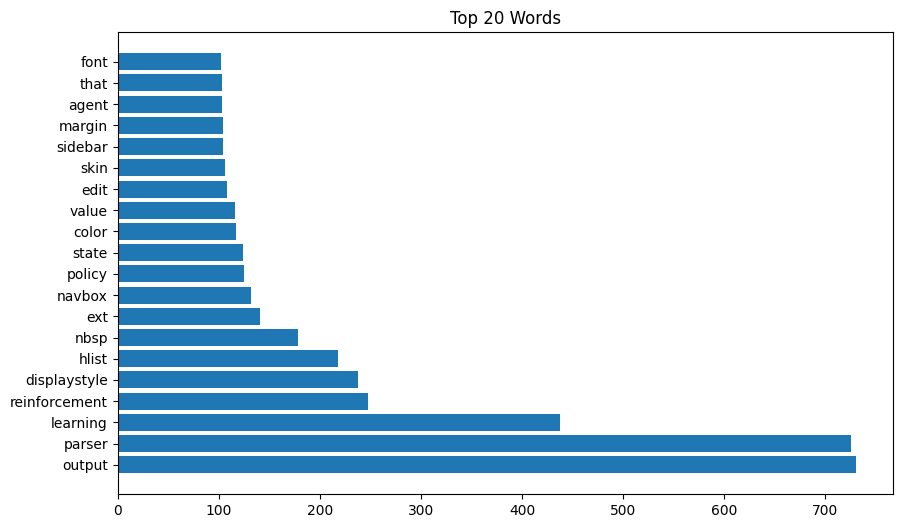

In [8]:
# Plot top 20 words
words = [item[0] for item in top_20]
counts = [item[1] for item in top_20]

plt.figure(figsize=(10, 6))
plt.barh(words, counts)
plt.title('Top 20 Words')
plt.show()

## Question 3: Text Clustering Implementation

In [9]:
text_data_file = '/content/drive/MyDrive/data_mining_and_warehousing/question_3_data.txt'

In [10]:
# Read and split text into documents
with open(text_data_file, 'r') as file:
    text = file.read()

documents = [sent.strip() for sent in text.split('.') if len(sent.strip()) > 50]
print(f"Documents: {len(documents)}")

Documents: 30


In [11]:
# Simple TF-IDF
import math

# Create vocabulary
vocab = set()
for doc in documents:
    words = re.findall(r'\b[a-zA-Z]{3,}\b', doc.lower())
    vocab.update(word for word in words if word not in stop_words)
vocab = list(vocab)[:100]  # Limit vocabulary size

# Compute TF-IDF
tfidf_matrix = []
for doc in documents:
    words = re.findall(r'\b[a-zA-Z]{3,}\b', doc.lower())
    word_count = {}
    for word in words:
        if word in vocab:
            word_count[word] = word_count.get(word, 0) + 1

    tfidf_vector = []
    for word in vocab:
        tf = word_count.get(word, 0) / len(words) if words else 0
        doc_freq = sum(1 for d in documents if word in d.lower())
        idf = math.log(len(documents) / (doc_freq + 1))
        tfidf_vector.append(tf * idf)
    tfidf_matrix.append(tfidf_vector)

In [12]:
# Simple K-means clustering
import random

def distance(p1, p2):
    return sum((a - b) ** 2 for a, b in zip(p1, p2)) ** 0.5

k = 3
centroids = [[random.random() for _ in range(len(vocab))] for _ in range(k)]

for _ in range(20):  # 20 iterations
    clusters = [[] for _ in range(k)]
    for i, point in enumerate(tfidf_matrix):
        distances = [distance(point, cent) for cent in centroids]
        clusters[distances.index(min(distances))].append(i)

    for i, cluster in enumerate(clusters):
        if cluster:
            centroids[i] = [sum(tfidf_matrix[j][dim] for j in cluster) / len(cluster)
                           for dim in range(len(vocab))]

print("Clustering results:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {len(cluster)} documents")

Clustering results:
Cluster 1: 0 documents
Cluster 2: 30 documents
Cluster 3: 0 documents


## Question 4: MSNBC Data Analysis

In [14]:
# Download MSNBC data
import urllib.request
import gzip

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/msnbc-mld/msnbc990928.seq.gz"
urllib.request.urlretrieve(url, "msnbc.seq.gz")

# Extract and read data
with gzip.open("msnbc.seq.gz", 'rt') as f:
    sequences = []
    for line in f:
        line = line.strip()
        if line and not line.startswith('%'):
            try:
                sequence = [int(x) for x in line.split()]
                if sequence:
                    sequences.append(sequence)
            except ValueError:
                continue

print(f"Downloaded and loaded {len(sequences)} sequences")

page_names = {1: 'frontpage', 2: 'news', 3: 'tech', 4: 'local', 5: 'opinion',
              6: 'on-air', 7: 'misc', 8: 'weather', 9: 'msn-news', 10: 'health',
              11: 'living', 12: 'business', 13: 'msn-sports', 14: 'sports',
              15: 'summary', 16: 'bbs', 17: 'travel'}

Downloaded and loaded 989818 sequences


Page frequencies:
frontpage: 940469
news: 452387
weather: 439398
on-air: 414928
sports: 395880
local: 386217
misc: 305615
business: 264899
msn-sports: 216125
tech: 207479
msn-news: 196614
opinion: 151409
health: 131760
living: 96817
summary: 56576
bbs: 25249
travel: 16972


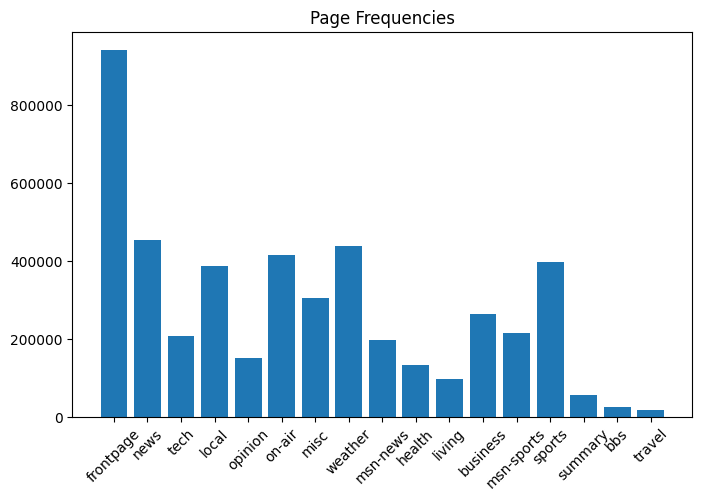

In [15]:
# Count page frequencies
page_count = {}
for sequence in sequences:
    for page in sequence:
        if page in page_names:
            page_count[page_names[page]] = page_count.get(page_names[page], 0) + 1

print("Page frequencies:")
for page, count in sorted(page_count.items(), key=lambda x: x[1], reverse=True):
    print(f"{page}: {count}")

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(page_count.keys(), page_count.values())
plt.title('Page Frequencies')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Count page transitions
transitions = {}
for sequence in sequences:
    for i in range(len(sequence) - 1):
        if sequence[i] in page_names and sequence[i+1] in page_names:
            transition = f"{page_names[sequence[i]]} → {page_names[sequence[i+1]]}"
            transitions[transition] = transitions.get(transition, 0) + 1

top_30 = sorted(transitions.items(), key=lambda x: x[1], reverse=True)[:30]
print("Top 30 transitions:")
for transition, count in top_30:
    print(f"{transition}: {count}")

Top 30 transitions:
frontpage → frontpage: 418764
weather → weather: 329235
sports → sports: 252592
local → local: 224891
news → news: 222340
misc → misc: 177517
on-air → on-air: 143982
business → business: 129836
msn-sports → msn-sports: 119008
opinion → opinion: 118987
msn-news → msn-news: 80559
frontpage → news: 73820
tech → tech: 71988
health → health: 67908
news → frontpage: 45476
frontpage → business: 41211
on-air → misc: 36783
frontpage → sports: 35992
misc → local: 33018
frontpage → on-air: 30579
living → living: 30540
misc → on-air: 29210
frontpage → misc: 28117
frontpage → living: 27260
business → frontpage: 27158
frontpage → local: 27130
sports → frontpage: 26361
misc → frontpage: 25214
frontpage → tech: 23795
bbs → bbs: 22145


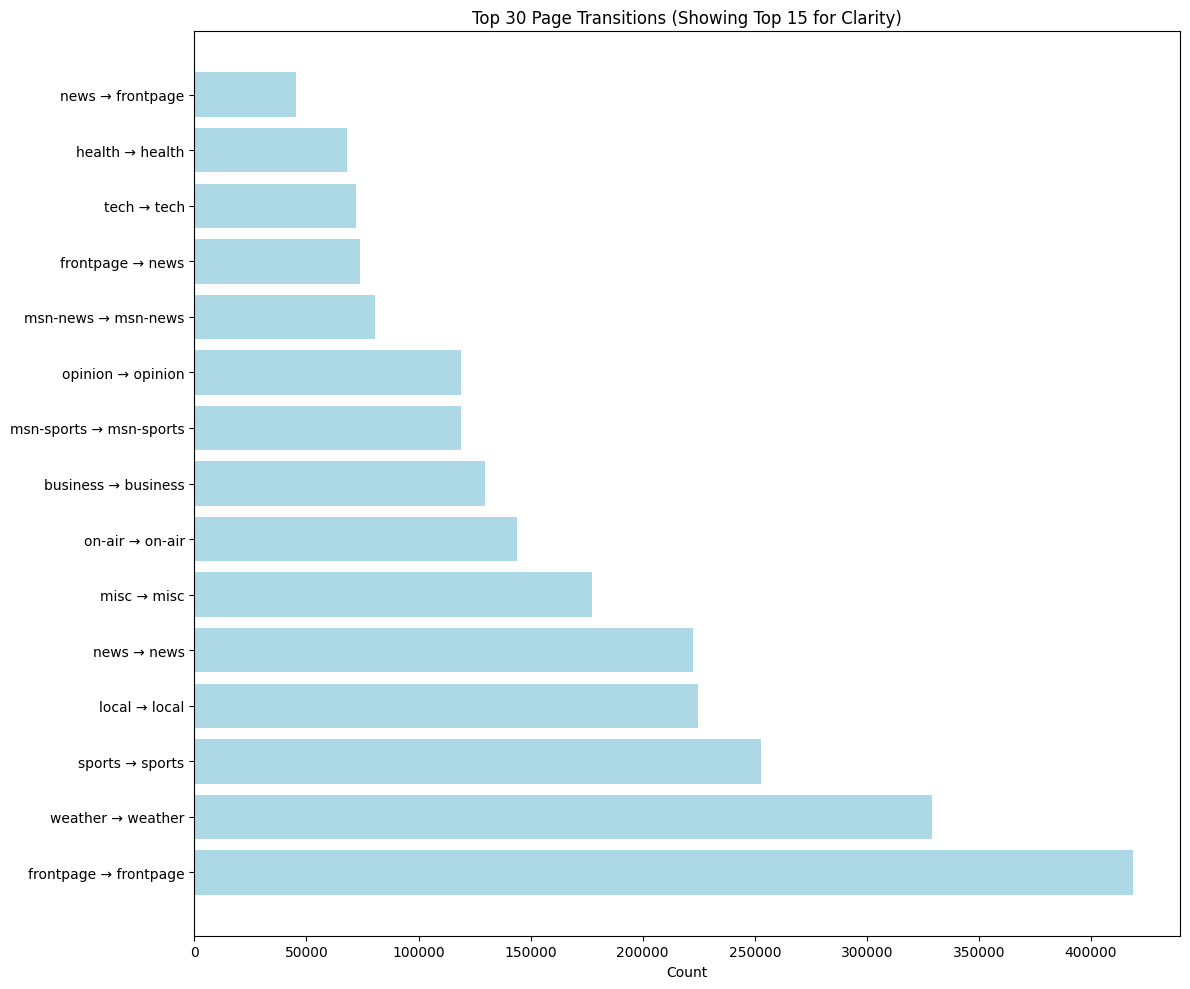

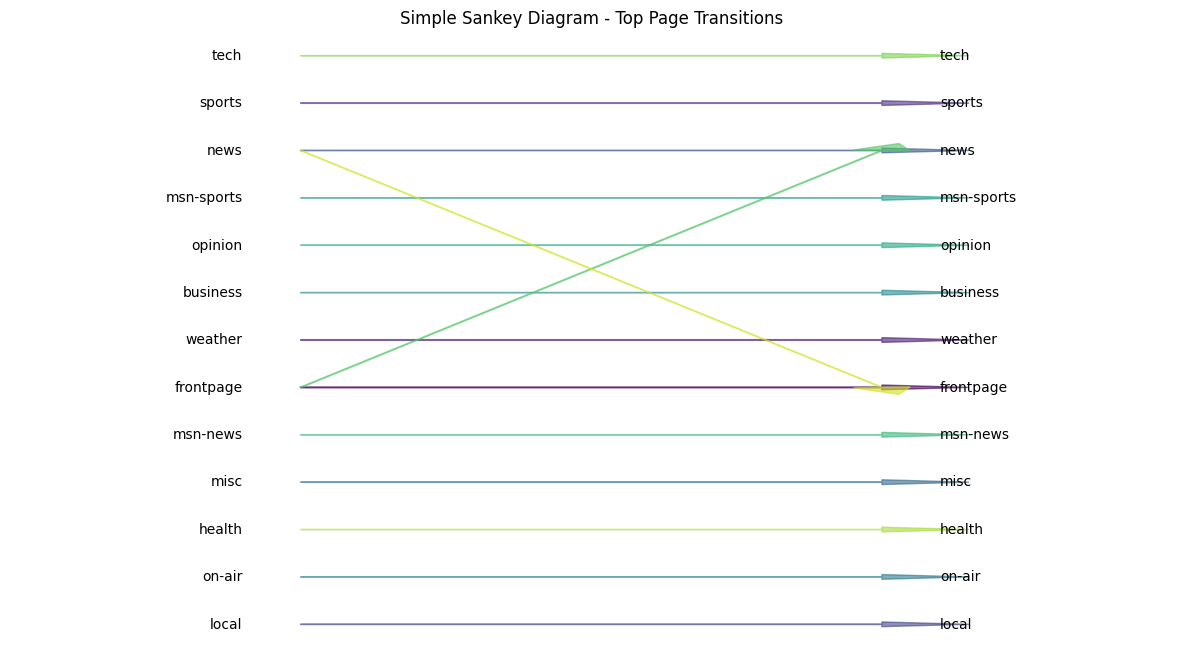

In [17]:
# Simple Sankey-style visualization for top 30 transitions
top_15_for_visual = top_30[:15]  # Show top 15 for better readability
transition_names = [t[0] for t in top_15_for_visual]
transition_counts = [t[1] for t in top_15_for_visual]

plt.figure(figsize=(12, 10))
plt.barh(transition_names, transition_counts, color='lightblue')
plt.title('Top 30 Page Transitions (Showing Top 15 for Clarity)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Create a simple flow diagram
sources = []
targets = []
values = []
for transition, count in top_15_for_visual:
    source, target = transition.split(' → ')
    sources.append(source)
    targets.append(target)
    values.append(count)

# Simple Sankey-style plot
unique_pages = list(set(sources + targets))
plt.figure(figsize=(15, 8))
for i, (source, target, value) in enumerate(zip(sources, targets, values)):
    source_pos = unique_pages.index(source)
    target_pos = unique_pages.index(target)
    plt.arrow(0, source_pos, 1, target_pos - source_pos,
              width=value/max(values)*0.02, alpha=0.6,
              head_width=0.1, color=plt.cm.viridis(i/len(sources)))

for i, page in enumerate(unique_pages):
    plt.text(-0.1, i, page, ha='right', va='center')
    plt.text(1.1, i, page, ha='left', va='center')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, len(unique_pages)-0.5)
plt.title('Simple Sankey Diagram - Top Page Transitions')
plt.axis('off')
plt.show()